In [1]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn import tree
import math
import datetime
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

#                                              Чтение файла

In [2]:
df = pd.read_csv(r"C:\Users\pc\Downloads\owid-covid-data.csv")
b1 = df.copy()

## Описание структуры набора данных
iso_code - ISO 3166-1 alpha-3 - трехбуквенные коды стран, Обратите внимание, что регионы, определенные OWID (например, континенты, такие как "Европа"), содержат префикс "OWID_".

continent - Континент географического положения.

location - Географическое положение.Местоположение "Международное" учитывает особые регионы (круизы "Diamond Princess" и "MS Zaandam").

date - Дата наблюдения/Дата в формате yyyy-mm-dd (То есть год-месяц-день)

total_cases - Общее количество подтвержденных случаев COVID-19, подсчеты могут включать вероятные случаи, о которых сообщалось.

new_cases - Новые подтвержденные случаи заболевания COVID-19, Подсчеты могут включать вероятные случаи, о которых сообщалось, в редких случаях, когда наш источник сообщает об отрицательном ежедневном изменении из-за коррекции данных, мы устанавливаем для этого показателя значение NA.

new_cases_smoothed - Новые подтвержденные случаи COVID-19 (7-дневный период сглажен), подсчеты могут включать вероятные случаи, о которых сообщалось.

total_deaths - Общее количество смертей, связанных с COVID-19, подсчеты могут включать вероятные случаи смерти, о которых сообщалось.

new_deaths - Новые случаи смерти, связанные с COVID-19, Подсчеты могут включать вероятные случаи смерти, о которых сообщалось, в редких случаях, когда наш источник сообщает об отрицательном ежедневном изменении из-за корректировки данных, мы устанавливаем для этого показателя значение NA.

new_deaths_smoothed - Новые случаи смерти, связанные с COVID-19 (сглажены за 7 дней), подсчеты могут включать вероятные случаи смерти, о которых сообщалось.

total_cases_per_million - Общее количество подтвержденных случаев COVID-19 на 1 000 000 человек, подсчеты могут включать вероятные случаи, о которых сообщалось.

new_cases_per_million - Новые подтвержденные случаи COVID-19 на 1 000 000 человек, подсчеты могут включать вероятные случаи, о которых сообщалось.

new_cases_smoothed_per_million - Новые подтвержденные случаи COVID-19 (сглаженные за 7 дней) на 1 000 000 человек, подсчеты могут включать вероятные случаи, о которых сообщалось.

total_deaths_per_million - Общее число смертей, связанных с COVID-19 на 1 000 000 человек, подсчеты могут включать вероятные случаи смерти, о которых сообщалось.

new_deaths_per_million - Новые случаи смерти, связанные с COVID-19, на 1 000 000 человек, подсчеты могут включать вероятные случаи смерти, о которых сообщалось.

new_deaths_smoothed_per_million - Новые случаи смерти, связанные с COVID-19 (сглаженные за 7 дней) на 1 000 000 человек, подсчеты могут включать вероятные случаи смерти, о которых сообщалось.

reproduction_rate - Оценка эффективной скорости размножения (R) COVID-19 в режиме реального времени.

См. https://github.com/crondonm/TrackingR/tree/main/Estimates-Database

icu_patients - Количество пациентов с COVID-19 в отделениях интенсивной терапии (ОИТ) за определенный день

icu_patients_per_million - Количество пациентов с COVID-19 в отделениях интенсивной терапии (ОИТ) в данный день на 1 000 000 человек

hosp_patients - Количество пациентов с COVID-19 в больнице в данный день

hosp_patients_per_million - Количество пациентов с COVID-19 в больнице в данный день на 1 000 000 человек

weekly_icu_admissions - Количество пациентов с COVID-19, вновь поступивших в отделения интенсивной терапии (ОИТ) за данную неделю (отчетная дата и предшествующие 6 дней)

weekly_icu_admissions_per_million - Число пациентов с COVID-19, вновь поступивших в отделения интенсивной терапии (ОИТ) за данную неделю на 1 000 000 человек (отчетная дата и предшествующие 6 дней)

weekly_hosp_admissions - Количество пациентов с COVID-19, вновь поступивших в больницы за данную неделю (отчетная дата и предшествующие 6 дней)

weekly_hosp_admissions_per_million - Число пациентов с COVID-19, вновь поступивших в больницы за данную неделю на 1 000 000 человек (отчетная дата и предшествующие 6 дней)

total_tests - Общее количество тестов на COVID-19 new_tests - Новые тесты на COVID-19 (рассчитываются только для последовательных дней)

total_tests_per_thousand - Общее количество тестов на COVID-19 на 1000 человек new_tests_smoothed - Новые тесты на COVID-19 (сглажены за 7 дней).

Для стран, которые не сообщают данные тестирования на ежедневной основе, мы предполагаем, что результаты тестирования ежедневно менялись одинаково в течение любых периодов, в которые данные не сообщались. В результате получается полный ряд ежедневных показателей, которые затем усредняются в течение 7-дневного периода

new_tests_smoothed_per_thousand - Новые тесты на COVID-19 (сглаженные за 7 дней) на 1000 человек

positive_rate - Доля положительных тестов на COVID-19, приведенная в виде скользящего среднего значения за 7 дней (это обратная величина tests_per_case)

tests_per_case - Тесты, проводимые для каждого нового подтвержденного случая COVID-19, приведены в виде скользящего среднего значения за 7 дней (это обратная величина positive_rate)

tests_units - Единицы, используемые местоположением для предоставления данных тестирования. Файл страны не может содержать смешанные единицы измерения. Все показатели, касающиеся данных тестирования, используют указанную тестовую единицу.

Допустимыми единицами измерения являются "проверенные люди" (количество проверенных людей), "проведенные тесты" (количество проведенных тестов. Одного человека можно тестировать более одного раза в день) и "проверенные образцы" (количество проверенных образцов.В некоторых случаях для выполнения одного теста может потребоваться более одного образца.)

total_vaccinations - Общее количество введенных доз вакцинации против COVID-19.

people_vaccinated - Общее число людей, получивших хотя бы одну дозу вакцины.

people_fully_vaccinated - Общее число людей, получивших все дозы, предписанные первоначальным протоколом вакцинации.

total_boosters - Общее количество введенных бустерных доз вакцинации против COVID-19(дозы, введенные сверх количества, предписанного протоколом вакцинации).

new_vaccinations - Вводятся новые дозы вакцинации против COVID-19 (рассчитанные только для последовательных дней).

#                                 Работаем с пустыми значениями                

In [3]:
# # Визуализация пустых значений в датафрейме
# fig, ax = plt.subplots(figsize=(9,5))
# sns.heatmap(b1.isnull(), cbar=False, cmap="YlGnBu_r")
# plt.show()

In [4]:
#удаляем NaNs через цикл
cols1 = df.axes[1]
for i in range(len(cols1)):
    if (b1[cols1[i]].dtype) == 'objects':
        b1[cols1[i]][pd.isna(b1[cols1[i]])] = 'Unknown'
    elif (b1[cols1[i]].dtype) == 'float64':
        pusto = pd.isna(b1[cols1[i]])
        sr = b1[cols1[i]].mean()
        b1.loc[(pusto), cols1[i]] = sr

In [5]:
# копирование датафрейма
# удаление всех столбцов в которых пропусков данных больше 10%
thresh = len(df)*0.8
b1 = df.loc[:, df.isna().sum().le(thresh)]

In [6]:
# b1.isnull().sum()

In [7]:
# b1.info()

In [8]:
b1.drop(columns = ["male_smokers", "female_smokers", "new_people_vaccinated_smoothed_per_hundred", "new_people_vaccinated_smoothed", "new_vaccinations_smoothed_per_million", "new_vaccinations_smoothed", "total_cases_per_million", 'new_cases_smoothed','new_cases_per_million', 'total_deaths_per_million', 'new_cases_smoothed_per_million', 'median_age', 'aged_65_older', 'aged_70_older', 'new_deaths_smoothed', 'new_deaths_per_million', 'new_deaths_smoothed_per_million'], inplace = True)
b1.drop(columns = ["total_tests","new_tests", "total_tests_per_thousand","new_tests_smoothed","new_tests_smoothed_per_thousand", "positive_rate", "tests_per_case", "tests_units", "total_vaccinations", "people_vaccinated", "people_fully_vaccinated", "new_vaccinations", "total_vaccinations_per_hundred", "extreme_poverty", "new_tests_per_thousand", "handwashing_facilities", "hospital_beds_per_thousand", "human_development_index", 'stringency_index', 'reproduction_rate'], inplace = True)
b1.drop(columns = ["gdp_per_capita", "population_density", "cardiovasc_death_rate", "life_expectancy", "diabetes_prevalence", "population"], inplace = True)

C:\Users\pc\AppData\Local\Temp\ipykernel_5760\2784058128.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b1.drop(columns = ["male_smokers", "female_smokers", "new_people_vaccinated_smoothed_per_hundred", "new_people_vaccinated_smoothed", "new_vaccinations_smoothed_per_million", "new_vaccinations_smoothed", "total_cases_per_million", 'new_cases_smoothed','new_cases_per_million', 'total_deaths_per_million', 'new_cases_smoothed_per_million', 'median_age', 'aged_65_older', 'aged_70_older', 'new_deaths_smoothed', 'new_deaths_per_million', 'new_deaths_smoothed_per_million'], inplace = True)
C:\Users\pc\AppData\Local\Temp\ipykernel_5760\2784058128.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.or

In [9]:
#удаляем NaNs через цикл
cols1 = b1.axes[1]
for i in range(len(cols1)):
    if (b1[cols1[i]].dtype) == 'objects':
        b1[cols1[i]][pd.isna(b2[cols1[i]])] = 'Unknown'
    elif (b1[cols1[i]].dtype) == 'float64':
        pusto = pd.isna(b1[cols1[i]])
        sr = b1[cols1[i]].mean()
        b1.loc[(pusto), cols1[i]] = sr
b2 = b1.copy()

In [10]:
b1 = b1.dropna()
b1 = b1.dropna(axis = 1)

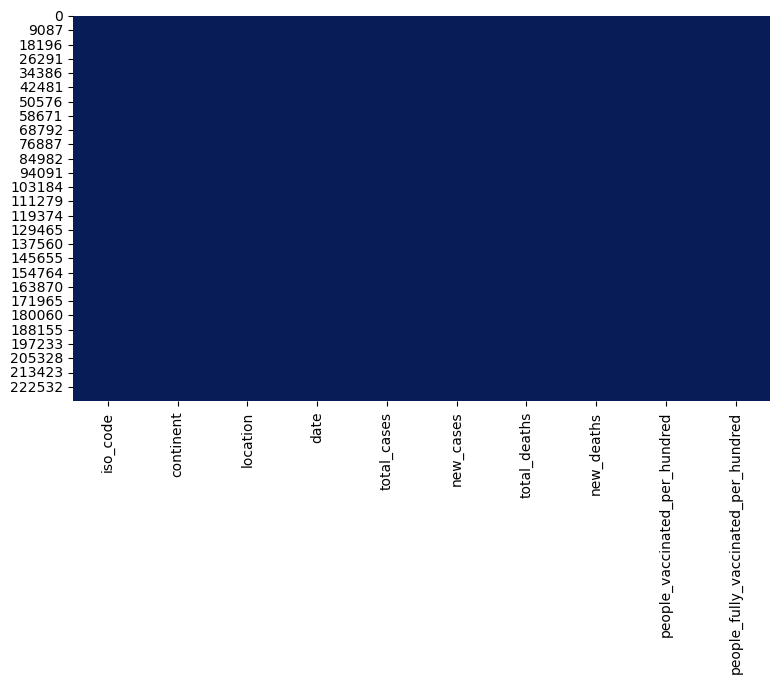

In [11]:
# Визуализация пустых значений в датафрейме
fig, ax = plt.subplots(figsize=(9,5))
sns.heatmap(b1.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

#                                         Получаем значение Rt

In [11]:
# Формула коэффициента распространения коронавируса:
# Rt = (X8+X7+X6+X5) / (X1+X2+X3+X4)
# x1,2,3,4 - значения заражаемсоти первых 4 суток
# x5,6,7,8 - значения заражаемсоти вторых 4 суток
# rt = (cases[7] + cases[6] + cases[5] + cases[4] / cases[0]+cases[1]+cases[2]+cases[3])

countrys = df.location.unique() # создаем список всех стран(уникальные значения столбца "location")
countrys = np.append(countrys, "stop") # добавляем стоп слово
cases = [] # список с 16 значениями заболеваемости в день
rt_countys = [] # список значений rt  
coll_point = 0 # индексное значение столбца "location"
country_point = 0 # индексное значение списка countrys
cases_point = 0 # индексное значение списка cases_point

In [12]:
while countrys[country_point] != "stop": # пока список countrys не дошел до стоп слова
    if countrys[country_point] == b2['location'][coll_point]: # если страна есть в столбце "location"
        for i in range (8): # цикл с добавлением 8 значений в cases, а после в rt
            cases.append(b2['new_cases'][cases_point])
            cases_point += 1
        rt = ((cases[7] + cases[6] + cases[5] + cases[4]) / (cases[0]+cases[1]+cases[2]+cases[3]))
        
        rt_countys.append(countrys[country_point] + ': ' + str(round(rt, 2)))
        cases.clear()
        country_point += 1
        coll_point += 1
    else:
        coll_point += 1
# for i in range(len(rt_countys)):
#     print(rt_countys[i])

C:\Users\pc\AppData\Local\Temp\ipykernel_5760\123895024.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  rt = ((cases[7] + cases[6] + cases[5] + cases[4]) / (cases[0]+cases[1]+cases[2]+cases[3]))
C:\Users\pc\AppData\Local\Temp\ipykernel_5760\123895024.py:6: RuntimeWarning: invalid value encountered in double_scalars
  rt = ((cases[7] + cases[6] + cases[5] + cases[4]) / (cases[0]+cases[1]+cases[2]+cases[3]))


#                      РАБОТА С ВЫБРОСАМИ И НОРМАЛИЗАЦИЯ

In [13]:
b2 = b1.copy()

In [14]:
b3 = b2[(b2['new_deaths']>=0) & (b2['new_deaths']<=100)]
cases_min = (b2['new_cases'] - b2['new_cases'].min())/(b2['new_cases'].max() - b2['new_cases'].min())
b2.insert(loc = len(b2.T), column = 'cases_min', value = cases_min)

In [15]:
b3

iso_code continent     location        date  total_cases  new_cases  \
28          AFG      Asia  Afghanistan  2020-03-23         40.0        6.0   
29          AFG      Asia  Afghanistan  2020-03-24         42.0        2.0   
30          AFG      Asia  Afghanistan  2020-03-25         74.0       32.0   
31          AFG      Asia  Afghanistan  2020-03-26         80.0        6.0   
32          AFG      Asia  Afghanistan  2020-03-27         91.0       11.0   
...         ...       ...          ...         ...          ...        ...   
231633      ZWE    Africa     Zimbabwe  2022-10-27     257893.0        0.0   
231634      ZWE    Africa     Zimbabwe  2022-10-28     257893.0        0.0   
231635      ZWE    Africa     Zimbabwe  2022-10-29     257893.0        0.0   
231636      ZWE    Africa     Zimbabwe  2022-10-30     257893.0        0.0   
231637      ZWE    Africa     Zimbabwe  2022-10-31     257893.0        0.0   

        total_deaths  new_deaths  people_vaccinated_per_hundred  \
28               1.0         1.0                      47.732702   
29               1.0         0.0                      47.732702   
30               1.0         0.0                      47.732702   
31               2.0         1.0                      47.732702   
32               2.0         0.0                      47.732702   
...              ...         ...                            ...   
231633        5606.0         0.0                      47.732702   
231634        5606.0         0.0                      47.732702   
231635        5606.0         0.0                      47.732702   
231636        5606.0         0.0                      47.732702   
231637        5606.0         0.0                      47.732702   

        people_fully_vaccinated_per_hundred  
28                                42.564346  
29                                42.564346  
30                                42.564346  
31                                42.564346  
32                                42.564346  
...                                     ...  
231633                            42.564346  
231634                            42.564346  
231635                            42.564346  
231636                            42.564346  
231637                            42.564346  

[173712 rows x 10 columns]

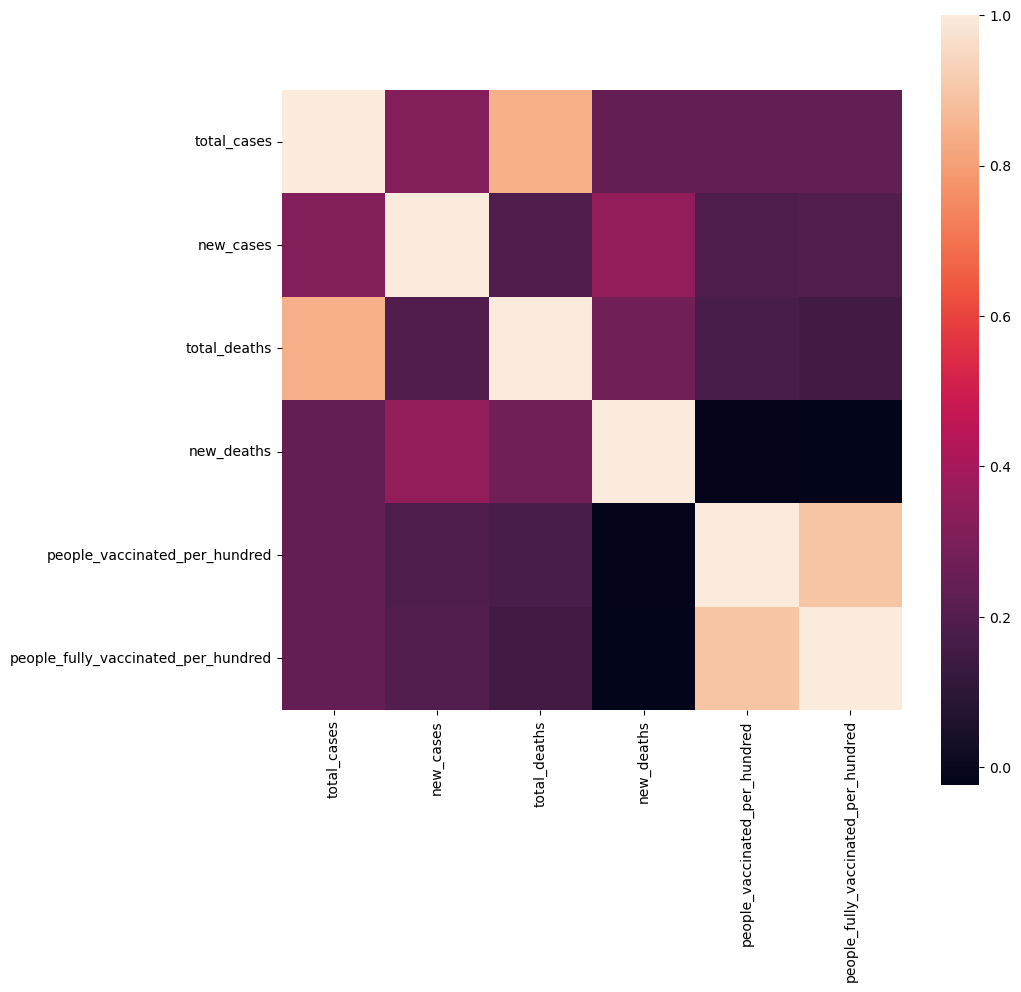

In [16]:
plt.subplots(figsize=(10,10))
sns.heatmap(b3.corr(), square=True)
plt.show()

In [17]:
# b2

# Работа с категориальными данными 

In [18]:
countys_name = b3.location.unique()
location_name = b3.location

In [19]:
cols_to_exclude = [' iso_code  ', ' hospital_beds_per_thousand ','  life_expectancy',' handwashing_facilities',' gdp_per_capita', 'continent ', 'location' , 'reproduction_rate  ', ' tests_units','population ',' human_development_index','life_expectancy','aged_70_older ',' aged_65_older']
for col in df.columns:
    if df[col].nunique() < 700 and col not in cols_to_exclude: 
        df[col] = df[col].astype('category')
# df.info()

In [20]:
a = str(b3.columns)
b = a.replace('\n','').replace("'",'').replace("(",' ').replace(")",'').replace("]",'').replace("[",'').replace("Index",'').replace(" ",'')
b = b.split(',')
b.remove(b[-1])
unique_counts = pd.DataFrame.from_records([(col, b3[col].nunique()) for col in b3.columns],
                                      columns=['Column_Name', 'Num_Unique']).sort_values(by=['Num_Unique'])
unique_counts

Column_Name  Num_Unique
1                            continent           6
7                           new_deaths         101
0                             iso_code         214
2                             location         214
3                                 date        1013
9  people_fully_vaccinated_per_hundred        9047
8        people_vaccinated_per_hundred        9348
5                            new_cases       11379
6                         total_deaths       26818
4                          total_cases       93304

In [21]:
for col in b3:
    # создание и обучение
    le = preprocessing.LabelEncoder()
    b3[col] = le.fit_transform(b3[col])
    integer_mapping = {l: i for i, l in enumerate(le.classes_)} 

C:\Users\pc\AppData\Local\Temp\ipykernel_5760\864477701.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b3[col] = le.fit_transform(b3[col])


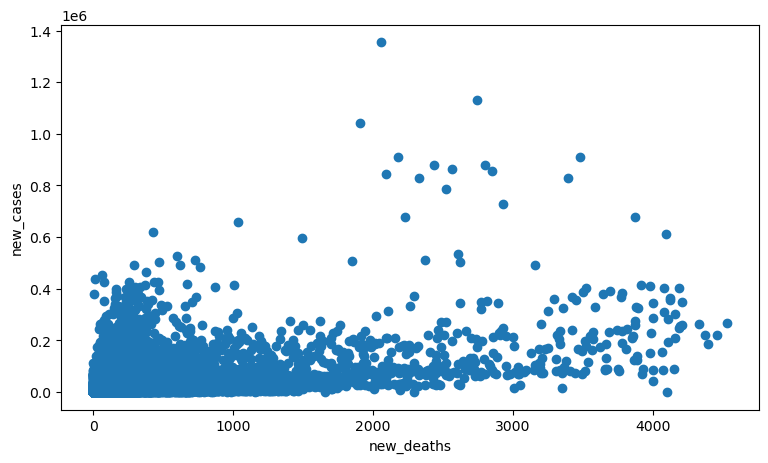

In [22]:
fig, ax = plt.subplots(figsize = (9,5))
ax.scatter(b1['new_deaths'], b1['new_cases'])
 
# x-axis label
ax.set_xlabel('new_deaths')
 
# y-axis label
ax.set_ylabel('new_cases')
plt.show()

#  Корреляция

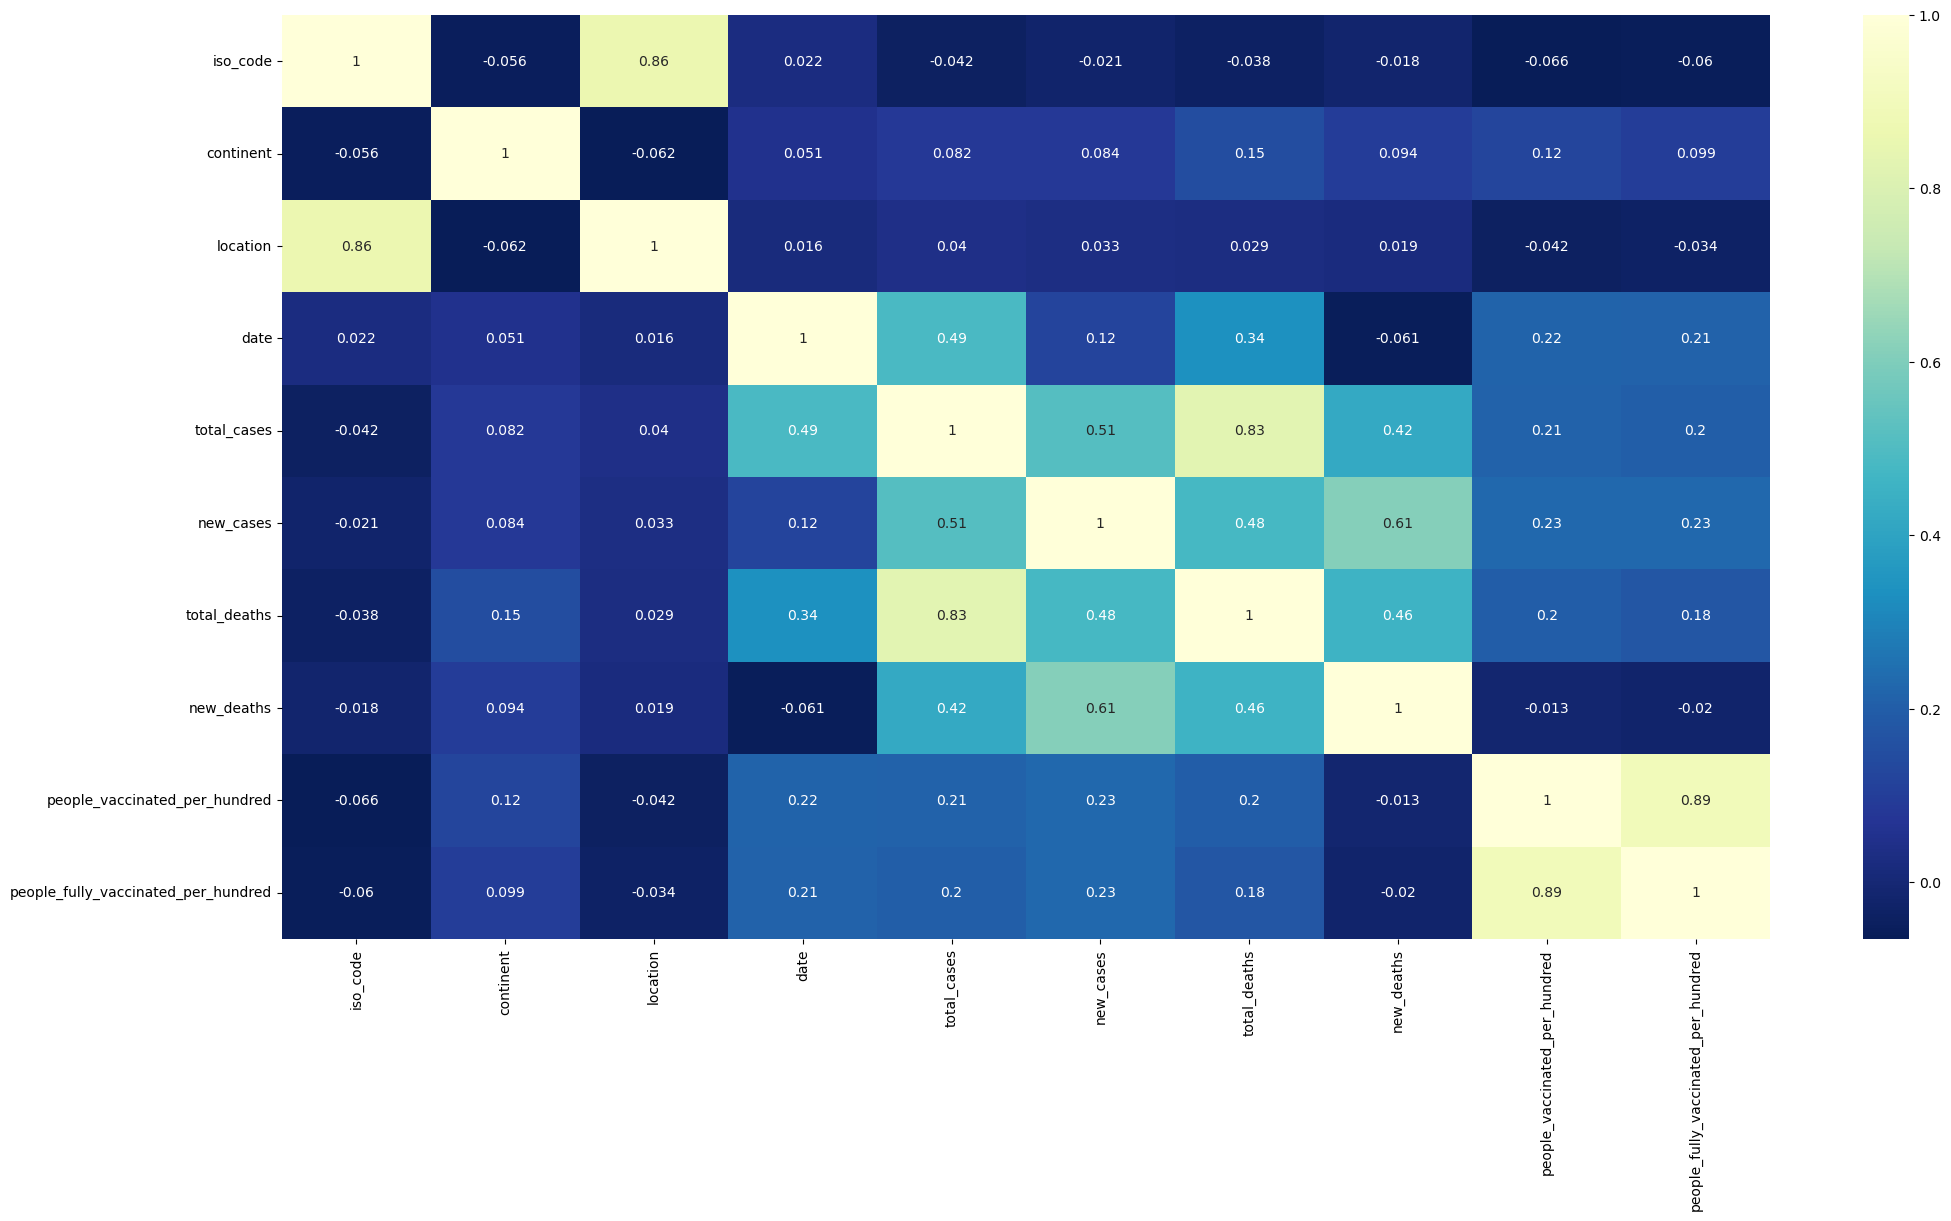

In [23]:
plt.figure(figsize=(24,12))
sns.heatmap(b3.corr(),annot=True,cmap="YlGnBu_r")
plt.show()

# Кластеризация набора данных

### Нормализация данных

In [24]:
df_norm = (b3 - b3.min())/(b3.max() - b3.min())

### KMeans Cluster

In [25]:
%%time
# Определяем количество кластеров, на сколько будем разбивать
n_clusters = 3

clusterer = KMeans(n_clusters=n_clusters)
# Учим и предсказываем наши кластеры
cluster_labels = clusterer.fit_predict(df_norm)

# inertia
inertia = clusterer.inertia_

Wall time: 905 ms


In [26]:
# Выводим предсказания
prediction = pd.DataFrame(cluster_labels, columns=['danger level for tourists'])
prediction = prediction.reset_index()
# prediction.drop(columns = ["level_0"], inplace = True)

In [27]:
print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia)

For n_clusters = 3 , the inertia is : 61688.94785271798


In [28]:
# значения столбца с уровнями опасности
a = list(prediction['danger level for tourists'].unique())
a

[1, 0, 2]

### GaussianMixture

In [29]:
%%time
n_clusters = 3
gmm_model = GaussianMixture(n_components=n_clusters)
cluster_labels = gmm_model.fit_predict(df_norm)
# inertia
inertia = clusterer.inertia_

Wall time: 3.81 s


In [30]:
print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia)

For n_clusters = 3 , the inertia is : 61688.94785271798


Выбираем алгоритм кластеризации по Коэффициент Силуэтта, чем ближе к 1, тем лучше

In [31]:
# Выводим предсказания
predictions2 = pd.DataFrame(cluster_labels, columns=['danger level for tourists'])
predictions2 = predictions2.reset_index()
predictions2

index  danger level for tourists
0            0                          0
1            1                          0
2            2                          0
3            3                          0
4            4                          0
...        ...                        ...
173707  173707                          0
173708  173708                          0
173709  173709                          0
173710  173710                          0
173711  173711                          0

[173712 rows x 2 columns]

In [32]:
# значения столбца с уровнями опасности
a = list(predictions2['danger level for tourists'].unique())
a

[0, 1, 2]

# SpectralClustering

In [33]:
# %%time
# from sklearn.cluster import SpectralClustering
# spectral_cluster_model= SpectralClustering(
#     n_clusters=3,
#     random_state=25,
#     n_neighbors=8,
#     affinity='nearest_neighbors'
# )
# cluster_labels = spectral_cluster_model.fit_predict(df_norm)
# inertia = clusterer.inertia_

In [34]:
print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia)

For n_clusters = 3 , the inertia is : 61688.94785271798


Выбираем алгоритм кластеризации по Коэффициент Силуэтта, чем ближе к 1, тем лучше

In [35]:
# Выводим предсказания
predictions3 = pd.DataFrame(cluster_labels, columns=['danger level for tourists'])
predictions3 = predictions3.reset_index()
predictions3

index  danger level for tourists
0            0                          0
1            1                          0
2            2                          0
3            3                          0
4            4                          0
...        ...                        ...
173707  173707                          0
173708  173708                          0
173709  173709                          0
173710  173710                          0
173711  173711                          0

[173712 rows x 2 columns]

In [36]:
# значения столбца с уровнями опасности
a = list(predictions3['danger level for tourists'].unique())
a

[0, 1, 2]

#### Выбираем алгоритм кластеризации по Коэффициент Силуэтта, чем ближе к 1, тем лучше

## Вывод

По итогу самой лучшей кластеризацией оказался метод KMeans

In [37]:
prediction

index  danger level for tourists
0            0                          1
1            1                          1
2            2                          1
3            3                          1
4            4                          1
...        ...                        ...
173707  173707                          2
173708  173708                          2
173709  173709                          2
173710  173710                          2
173711  173711                          2

[173712 rows x 2 columns]

In [38]:
yellow_points = np.count_nonzero(prediction['danger level for tourists'] == 0)

In [39]:
red_points = np.count_nonzero(prediction['danger level for tourists'] == 1)

In [40]:
green_points = np.count_nonzero(prediction['danger level for tourists'] == 2)

In [41]:
print(green_points, yellow_points, red_points)

70624 41834 61254


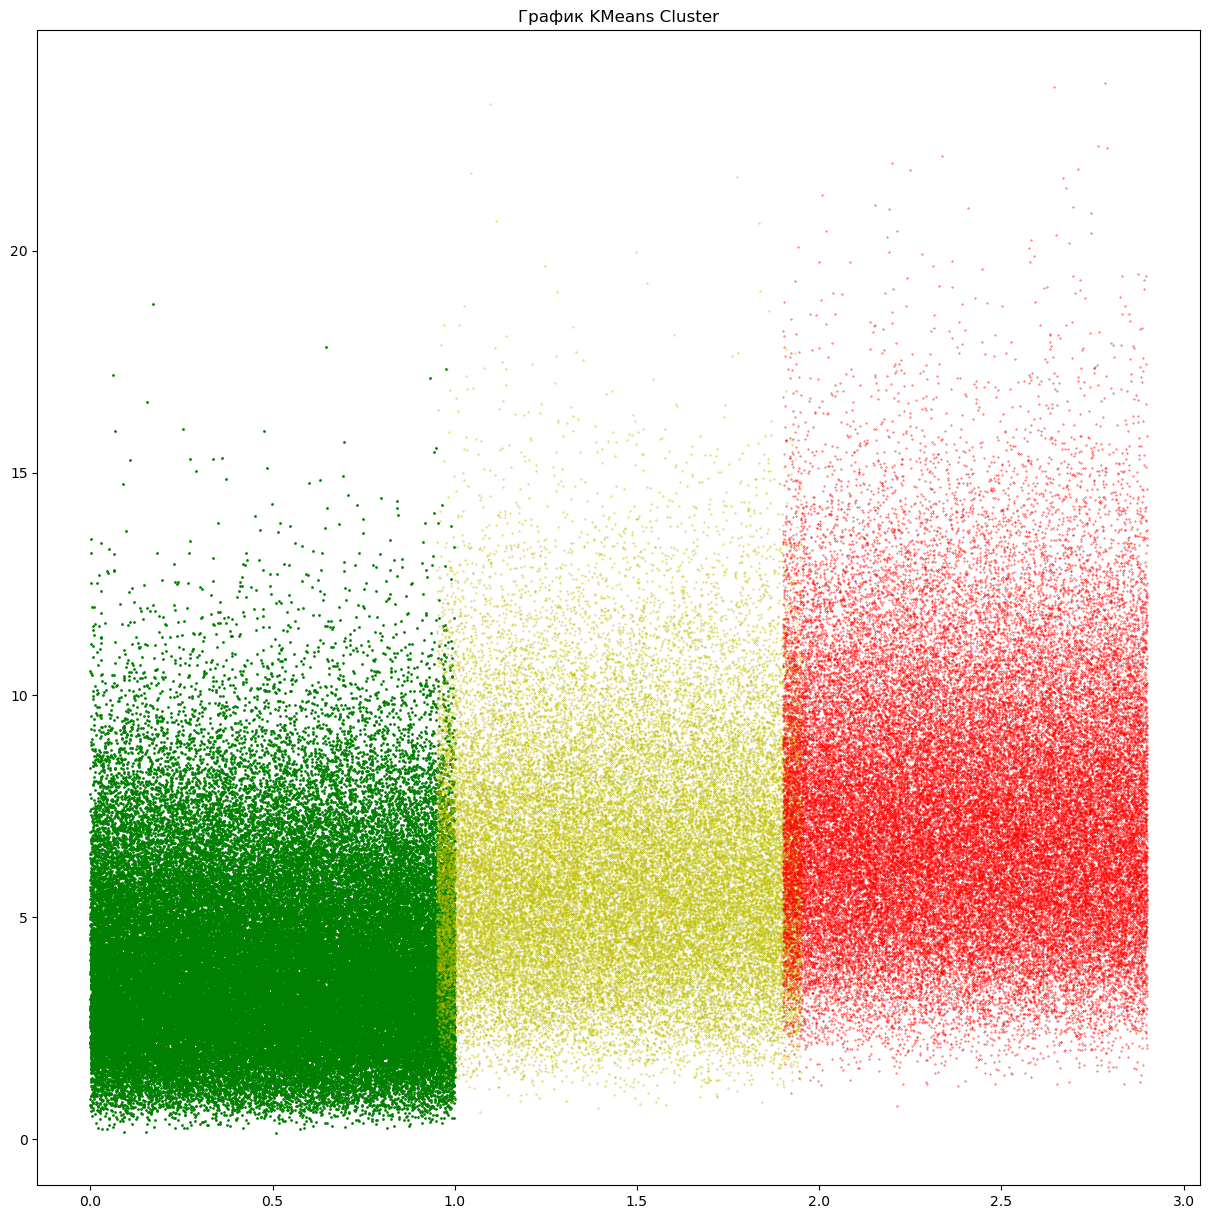

In [42]:
x1 = np.random.rand(green_points)
x2 = np.random.rand(yellow_points)
x3 = np.random.rand(red_points)
y1 = np.random.gamma(4, size = green_points)
y2 = np.random.gamma(6.2, size = yellow_points)
y3 = np.random.gamma(7.4, size = red_points)

fig, ax = plt.subplots()

ax.scatter(x1, y1, c = 'g', s = 1)

ax.scatter(x2 + 0.95, y2, c = 'y', s = 0.1)

ax.scatter(x3 + 1.9, y3, c = 'r', s = 0.1)


ax.set_title('График KMeans Cluster')


fig.set_figwidth(15)
fig.set_figheight(15)

plt.show()

# Окочательное формирование БД

# Session #2

In [43]:
owid = pd.read_csv(r"C:\Users\pc\Downloads\owid.csv")
owid

iso_code  continent  location  date  total_cases  new_cases  \
0              1          1         0    60           39          6   
1              1          1         0    61           41          2   
2              1          1         0    62           73         32   
3              1          1         0    63           79          6   
4              1          1         0    64           90         11   
...          ...        ...       ...   ...          ...        ...   
173707       213          0       213  1008        53361          0   
173708       213          0       213  1009        53361          0   
173709       213          0       213  1010        53361          0   
173710       213          0       213  1011        53361          0   
173711       213          0       213  1012        53361          0   

        total_deaths  new_deaths  
0                  0           1  
1                  0           0  
2                  0           0  
3                  1           1  
4                  1           0  
...              ...         ...  
173707          5476           0  
173708          5476           0  
173709          5476           0  
173710          5476           0  
173711          5476           0  

[173712 rows x 8 columns]

In [44]:
b4 = owid.copy()
b4["danger_level_for_tourists"] = prediction["danger level for tourists"]

In [45]:
b4.isnull().sum()

iso_code                     0
continent                    0
location                     0
date                         0
total_cases                  0
new_cases                    0
total_deaths                 0
new_deaths                   0
danger_level_for_tourists    0
dtype: int64

#  Разбиение набора данных


In [46]:
from sklearn. model_selection import train_test_split

train, test = train_test_split(b4, test_size= 0.5 , random_state= 0 )
dframe11 = b4.copy()

In [47]:
train #Набор для обучения

iso_code  continent  location  date  total_cases  new_cases  \
51408         58          0        59   604        56192        637   
22072         16          3        24   952         9941          0   
85466         99          1       100   994        80482          0   
45839         39          0        53   226         9185         29   
48168         52          0        55   661        11682          0   
...          ...        ...       ...   ...          ...        ...   
95939        115          2       113   356        45378       1779   
152315       182          2       186   647        78134          0   
117952       140          0       142   188         1130          0   
173685       213          0       213   986        53333          0   
43567         47          3        50   620        13827          9   

        total_deaths  new_deaths  danger_level_for_tourists  
51408          13696          16                          0  
22072             37           0                          1  
85466          14893           0                          0  
45839            258           0                          1  
48168            185           0                          1  
...              ...         ...                        ...  
95939           2325          38                          2  
152315         12413           0                          0  
117952            68           0                          2  
173685          5473           0                          2  
43567            164           1                          1  

[86856 rows x 9 columns]

In [48]:
test #Тестовый набор

iso_code  continent  location  date  total_cases  new_cases  \
72311         85          3        84   796        19896          0   
21585         16          3        24   463         1553          2   
58079         64          4        67   431           66          0   
156642       197          0       191   297          508          0   
26310         19          2        30   359        49204        233   
...          ...        ...       ...   ...          ...        ...   
71353         81          5        83   775        29423         14   
1416           4          2         1   512        41068          3   
155433       196          1       189   945        89340       9934   
10446         12          1        12    61           86         15   
23555         31          0        26   556        37483          0   

        total_deaths  new_deaths  danger_level_for_tourists  
72311            832           0                          1  
21585             14           0                          1  
58079              1           0                          1  
156642            20           0                          2  
26310           8085          17                          1  
...              ...         ...                        ...  
71353           1222           0                          1  
1416            2452           0                          1  
155433          9187          37                          0  
10446              0           0                          1  
23555           1568           0                          1  

[86856 rows x 9 columns]

# Визуализация зависимостей данных

In [49]:
loc = 0
max_list = []
for i in range(173712):
    if (b4['location'][i]) != loc:
        max_list.append(b4['total_deaths'][i-1])
        loc += 1
max_list.append(b4['total_deaths'][173711])

In [50]:
loc = 0
max_cases_list = []
for i in range(173712):
    if (b4['location'][i]) != loc:
        max_cases_list.append(b4['total_cases'][i-1])
        loc += 1
max_cases_list.append(b4['total_cases'][173711])

In [51]:
index = []
for i in range(214):
    index.append(i)

In [52]:
dframe = pd.DataFrame(countys_name)
dframe['max_death'] = max_list
dframe['max_cases'] = max_cases_list
dframe.columns =['country', 'max_death', 'max_cases']

In [53]:
dframe

country  max_death  max_cases
0          Afghanistan       7507      48359
1              Albania       3581      58212
2              Algeria       6690      54436
3              Andorra        154      25192
4               Angola       1916      37074
..                 ...        ...        ...
209            Vietnam      20999      91989
210  Wallis and Futuna          6        760
211              Yemen       2157      10511
212             Zambia       3993      58266
213           Zimbabwe       5476      53361

[214 rows x 3 columns]

## колличество смертей по странам

In [55]:
px.bar(dframe, x = 'country', y = 'max_death',
       color = 'max_death', height = 500,
       hover_data = ['country', 'country'])

## Колличество заболеваний по странам

In [56]:
px.bar(dframe, x = 'country', y = 'max_cases',
       color = 'max_cases', height = 500,
       hover_data = ['country', 'country'])

## Процент умерших к заболевшим

In [57]:
px.bar(dframe, x = 'country', y = 100 / (dframe['max_cases']/dframe['max_death']),
color = 100 / (dframe['max_cases']/dframe['max_death']), height = 500,
hover_data = ['country', 'country'])

#  Классификация исходных компетенций


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Feature Engineering

In [55]:
b4

iso_code  continent  location  date  total_cases  new_cases  \
0              1          1         0    60           39          6   
1              1          1         0    61           41          2   
2              1          1         0    62           73         32   
3              1          1         0    63           79          6   
4              1          1         0    64           90         11   
...          ...        ...       ...   ...          ...        ...   
173707       213          0       213  1008        53361          0   
173708       213          0       213  1009        53361          0   
173709       213          0       213  1010        53361          0   
173710       213          0       213  1011        53361          0   
173711       213          0       213  1012        53361          0   

        total_deaths  new_deaths  danger_level_for_tourists  
0                  0           1                          1  
1                  0           0                          1  
2                  0           0                          1  
3                  1           1                          1  
4                  1           0                          1  
...              ...         ...                        ...  
173707          5476           0                          2  
173708          5476           0                          2  
173709          5476           0                          2  
173710          5476           0                          2  
173711          5476           0                          2  

[173712 rows x 9 columns]

In [56]:
b4.describe()

iso_code      continent       location           date  \
count  173712.000000  173712.000000  173712.000000  173712.000000   
mean      104.388695       1.598312     103.879974     558.301079   
std        61.915827       1.417018      62.115967     276.175947   
min         0.000000       0.000000       0.000000       0.000000   
25%        50.000000       0.000000      50.000000     322.000000   
50%       105.000000       1.000000     103.000000     569.000000   
75%       159.000000       3.000000     157.000000     802.000000   
max       213.000000       5.000000     213.000000    1012.000000   

         total_cases      new_cases   total_deaths     new_deaths  \
count  173712.000000  173712.000000  173712.000000  173712.000000   
mean    33525.810917     767.296577    4037.764311       7.446031   
std     29117.926386    1817.435855    6452.670138      16.621306   
min         0.000000       0.000000       0.000000       0.000000   
25%      6701.750000       0.000000      89.000000       0.000000   
50%     25325.000000      47.000000     712.000000       0.000000   
75%     58265.250000     534.000000    5029.250000       6.000000   
max     93303.000000   11378.000000   26817.000000     100.000000   

       danger_level_for_tourists  
count              173712.000000  
mean                    1.165734  
std                     0.787348  
min                     0.000000  
25%                     1.000000  
50%                     1.000000  
75%                     2.000000  
max                     2.000000

<AxesSubplot:>

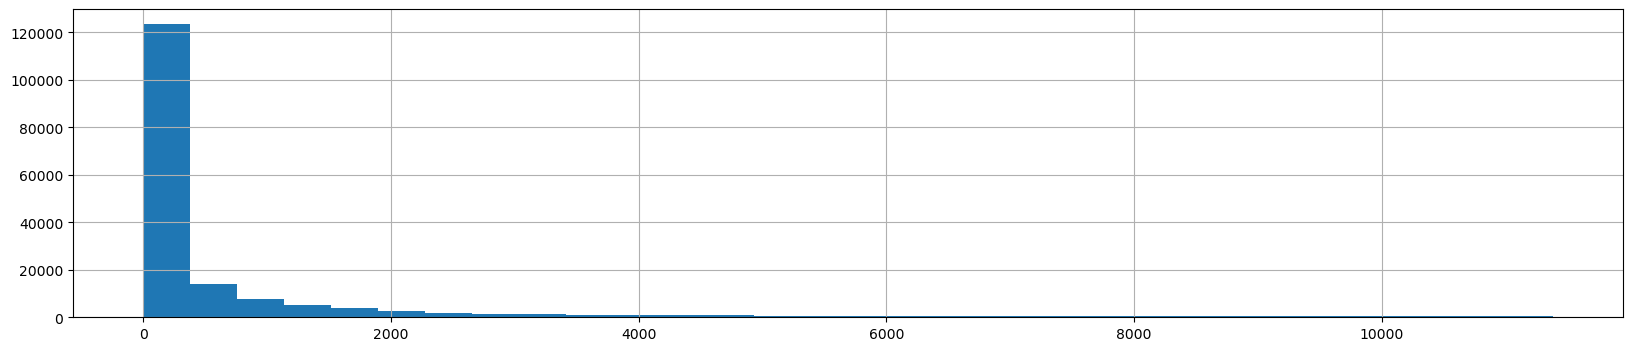

In [57]:
b4['new_cases'].hist(bins=30, figsize=(20,4))

In [58]:
b4[b4['new_cases']>47]['total_cases'].count()

86728

In [59]:
col = b4.axes[1]
X=pd.DataFrame()
for i in col:
    if b4[i].dtype.name != 'object':
        X[i]=b4[i].copy()
        X.loc[X[i].isna(), i]=X[i].median()
    else:
        X[i]=pd.factorize(b4[i])[0]

In [60]:
X.sample(3)

iso_code  continent  location  date  total_cases  new_cases  \
168996       204          5       208   362        39307        673   
16209         14          2        18   217        33367        470   
2467          56          0         2   599        48066        233   

        total_deaths  new_deaths  danger_level_for_tourists  
168996          1115           4                          2  
16209           9311           5                          1  
2467            5467          18                          1

In [61]:
import random
# Y будет равен нулю если отзывов 10 и меньше, и единице если больше 10
Y=b4['danger_level_for_tourists'].apply(lambda x: 0 if x>0 else random.randint(1,2)).values

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Обучение методом наивный байесовский

In [63]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(X_train, y_train)                  # 3. fit model to data
y_model = model.predict(X_test)             # 4. predict on new data

In [64]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_model)

0.84520622859281

#  Обучение методом RandomForest

In [65]:
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier()

In [66]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

ar_f=[]
for f, idx in enumerate(indices):
    ar_f.append([round(importances[idx],4), col[idx]])
print("Значимость признака:")
ar_f.sort(reverse=True)
ar_f

Значимость признака:


[[0.3178, 'danger_level_for_tourists'],
 [0.2726, 'total_cases'],
 [0.1743, 'total_deaths'],
 [0.094, 'date'],
 [0.0765, 'new_cases'],
 [0.0378, 'new_deaths'],
 [0.0113, 'location'],
 [0.0108, 'iso_code'],
 [0.0048, 'continent']]

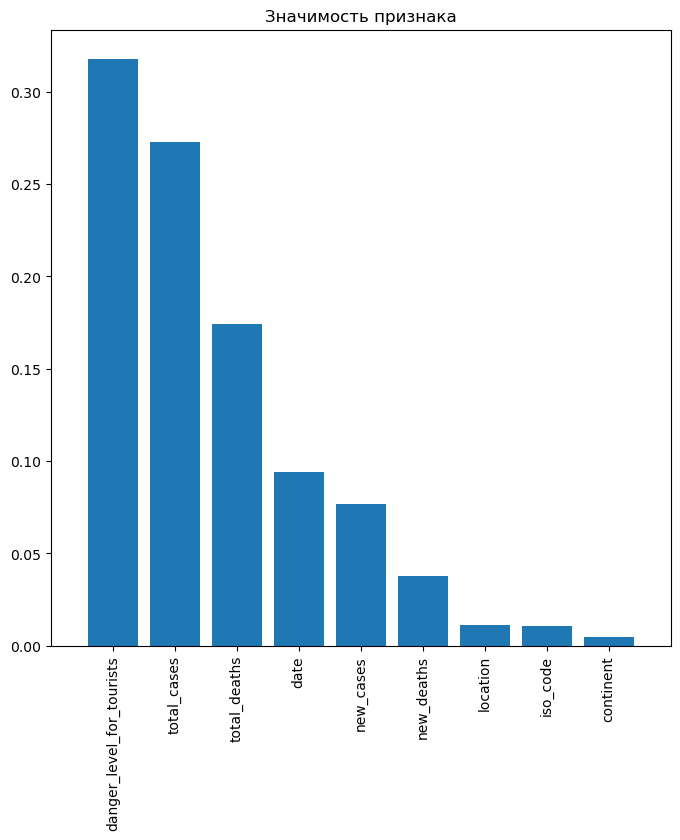

In [67]:
#удобнее отобразить на столбчатой диаграмме
d_first = len(col)
plt.figure(figsize=(8, 8))
plt.title("Значимость признака")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(col)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);

In [68]:
# как выглядит результат предсказания для тестовой выборки
model.predict(X_test)

array([0, 0, 2, ..., 1, 2, 0], dtype=int64)

In [69]:
# как выглядядт результаты тестового набора
y_test

array([0, 0, 1, ..., 1, 2, 0], dtype=int64)

In [70]:
# метрика r2
r2_score(model.predict(X_test), y_test)

0.7484588185364744

In [71]:
from sklearn import metrics
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
print("Accuracy:",metrics.accuracy_score(y_test, model.predict(X_test)))

Accuracy: 0.8817603546038051


In [72]:
# матрица количества правильно и ошибочно угаданных классов
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[26421,     0,     0],
       [    0,  2095,  2047],
       [    0,  2061,  2119]], dtype=int64)

In [73]:
# Еще базовые метрики оценки точности модели
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26421
           1       0.50      0.51      0.50      4142
           2       0.51      0.51      0.51      4180

    accuracy                           0.88     34743
   macro avg       0.67      0.67      0.67     34743
weighted avg       0.88      0.88      0.88     34743



# Session #3 

# Линейная регрессия

In [74]:
from sklearn.linear_model import LinearRegression

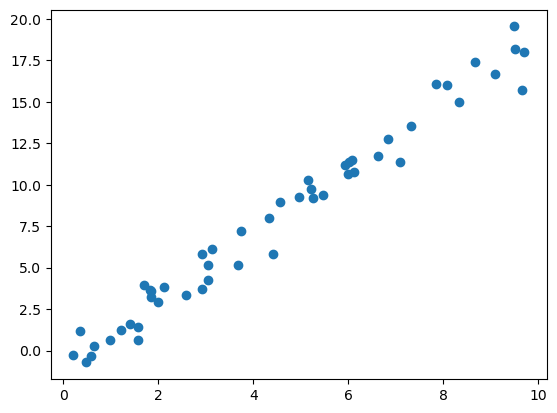

In [75]:
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)

In [76]:
model = LinearRegression(fit_intercept=True)
model
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(n_jobs=1, normalize=False)

In [77]:
X = x[:, np.newaxis]
X.shape
model.fit(X, y)

LinearRegression()

In [78]:
model.coef_

array([1.9776566])

In [79]:
model.intercept_

-0.9033107255311164

In [80]:
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

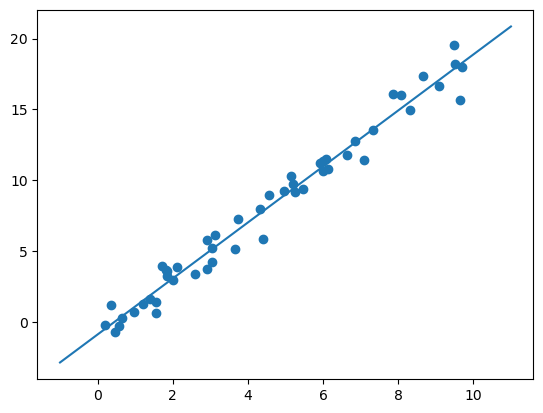

In [81]:
plt.scatter(x, y)
plt.plot(xfit, yfit)

# Регрессия методом Кокса

In [82]:
from scipy. stats import boxcox 

In [83]:
b4

iso_code  continent  location  date  total_cases  new_cases  \
0              1          1         0    60           39          6   
1              1          1         0    61           41          2   
2              1          1         0    62           73         32   
3              1          1         0    63           79          6   
4              1          1         0    64           90         11   
...          ...        ...       ...   ...          ...        ...   
173707       213          0       213  1008        53361          0   
173708       213          0       213  1009        53361          0   
173709       213          0       213  1010        53361          0   
173710       213          0       213  1011        53361          0   
173711       213          0       213  1012        53361          0   

        total_deaths  new_deaths  danger_level_for_tourists  
0                  0           1                          1  
1                  0           0                          1  
2                  0           0                          1  
3                  1           1                          1  
4                  1           0                          1  
...              ...         ...                        ...  
173707          5476           0                          2  
173708          5476           0                          2  
173709          5476           0                          2  
173710          5476           0                          2  
173711          5476           0                          2  

[173712 rows x 9 columns]

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='new_cases', ylabel='Density'>

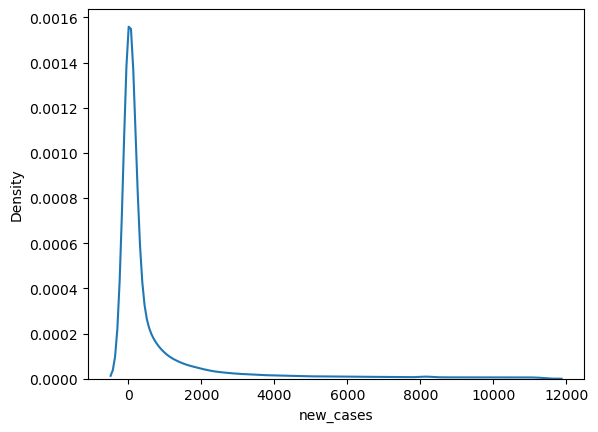

In [84]:
#plot the distribution of data values
sns.distplot (b4['new_cases'], hist= False , kde= True )

In [85]:
basa_date = b4[b4['new_cases'] != 0]

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

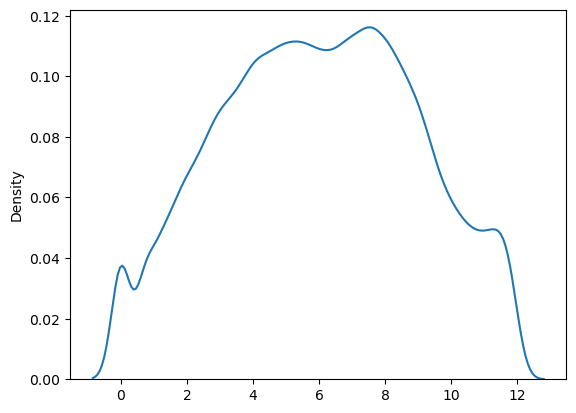

In [86]:
#perform Box-Cox transformation on original data
transformed_data, best_lambda = boxcox(basa_date['new_cases']) 

#plot the distribution of the transformed data values
sns.distplot (transformed_data, hist= False , kde= True ) 

In [87]:
print(best_lambda)
#Было обнаружено, что оптимальная лямбда составляет примерно 0.051

0.05083838863559696


# Session #4

### Собираю БД откуда ТГ бот будет брать информацию

In [88]:
dframe1 = dframe.drop(['country'], axis = 1)
dframe_norm = (dframe1 - dframe1.min())/(dframe1.max() - dframe1.min())

In [89]:
%%time
# Определяем количество кластеров, на сколько будем разбивать
n_clusters = 3

clusterer = KMeans(n_clusters=n_clusters)
# Учим и предсказываем наши кластеры
cluster_labels = clusterer.fit_predict(dframe_norm)

# inertia
inertia = clusterer.inertia_

Wall time: 41 ms


In [90]:
# Выводим предсказания
prediction_df = pd.DataFrame(cluster_labels, columns=['danger level for tourists'])
prediction_df = prediction_df.reset_index()
# prediction.drop(columns = ["level_0"], inplace = True)

In [91]:
print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia)

For n_clusters = 3 , the inertia is : 5.366456007412174


In [92]:
# значения столбца с уровнями опасности
a = list(prediction_df['danger level for tourists'].unique())
a

[0, 2, 1]

In [93]:
dframe['danger level for tourists'] = prediction_df['danger level for tourists']

In [94]:
dframe

country  max_death  max_cases  danger level for tourists
0          Afghanistan       7507      48359                          0
1              Albania       3581      58212                          0
2              Algeria       6690      54436                          0
3              Andorra        154      25192                          2
4               Angola       1916      37074                          2
..                 ...        ...        ...                        ...
209            Vietnam      20999      91989                          1
210  Wallis and Futuna          6        760                          2
211              Yemen       2157      10511                          2
212             Zambia       3993      58266                          0
213           Zimbabwe       5476      53361                          0

[214 rows x 4 columns]

In [95]:
dframe.to_csv(r'C:\Users\pc\Downloads\tg_bot.csv', index=False)

In [ ]:
dframe.loc[dframe['country'].str[0].isin([ams]), 'country']

In [ ]:
train_data = pd.read_csv(r"C:\Users\pc\Downloads\forML_1.csv")

In [ ]:
train_data

### Делаем тип обьекта datatime в столбце "Date"

In [ ]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)

In [ ]:
country = train_data[train_data["location"].str.contains('Iran')] # Все строки со значениями Афганистан

In [ ]:
country

### Построение графика по заболеваемости

In [ ]:
# plt.figure(figsize=(11, 8)) # resizing the plot
# country['total_cases'].plot()
# plt.title(train_data["location"][1]) # adding a title
# plt.xlabel('date') # x label
# plt.ylabel('total_cases') # y label
# plt.show()

In [ ]:
df = country[['total_cases', 'new_cases', 'total_deaths','new_deaths', 'danger level for tourists']]

In [ ]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
df['label'] = df['total_cases'].shift(-forecast_out)

In [ ]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

In [ ]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

In [ ]:
df.dropna(inplace=True)
y = np.array(df['label'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [ ]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

In [ ]:
plt.figure(figsize=(18, 8))
df['total_cases'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('total_deaths')
plt.show()